In [1]:
import nltk

nltk.__version__

'3.4.1'

# 토큰화 및 정규화를 하는 이유

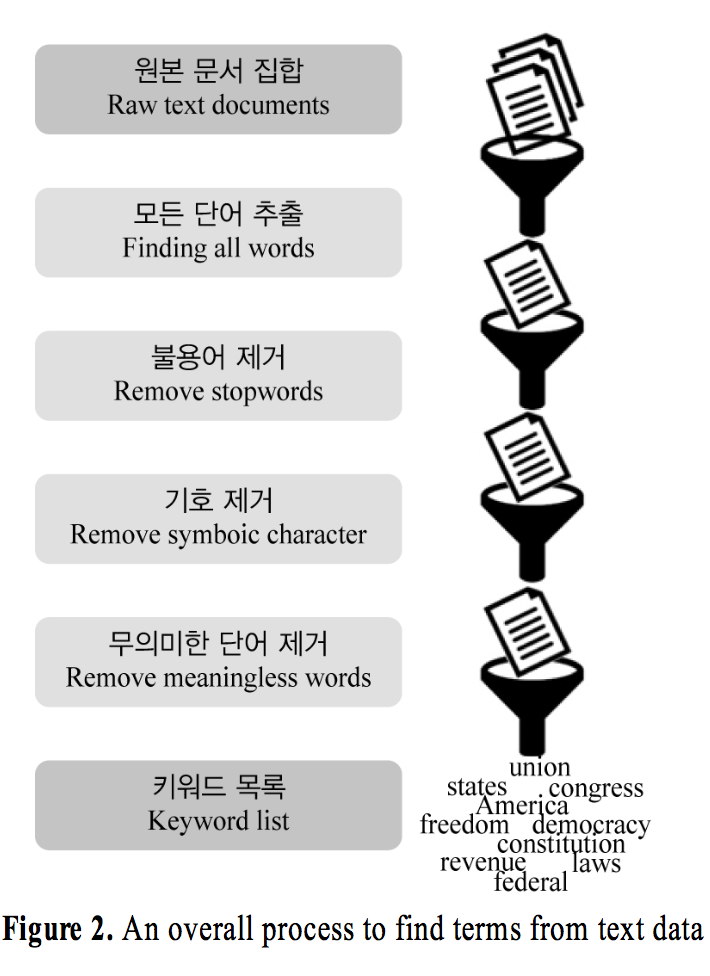

In [2]:
from IPython.display import Image
Image(filename='tokenization.png')

# 1. 토근화 

#  1.1 텍스트를 문장을  하나의 토큰 단위로 처리하기 

### sent_tokenize 함수로 처리

In [3]:
help(nltk.download)

Help on method download in module nltk.downloader:

download(info_or_id=None, download_dir=None, quiet=False, force=False, prefix='[nltk_data] ', halt_on_error=True, raise_on_error=False, print_error_to=<ipykernel.iostream.OutStream object at 0x000001B8ABE95F98>) method of nltk.downloader.Downloader instance



In [4]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dahlmoon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
import nltk.tokenize as ntok

In [6]:
ntok.sent_tokenize("Welcome readers. I hope you find it interesting. Please on reply.")

['Welcome readers.', 'I hope you find it interesting.', 'Please on reply.']

### PunktSentenceTokenizer 클래스로 처리 

In [7]:
tokenizer = nltk.PunktSentenceTokenizer()
tokenizer.tokenize("Welcome readers. I hope you find it interesting. Please on reply.")

['Welcome readers.', 'I hope you find it interesting.', 'Please on reply.']

# 1.2 문장을 단어를 하나의 토큰 단위로 처리하기

    스페이스와 문장부호를 기준으로 단어를 분리한다.
    

### 화이트스페이스는 토큰처리가 안 되는 것을 확인할 수 있다.

In [8]:
import string

ntok.word_tokenize(string.whitespace)

[]

### 문장부호를 토큰화하면 각 문장부호 단위로 토큰화가 되는 것을 확인할 수 있다.


In [9]:
import string

print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [10]:
import string

ntok.word_tokenize(string.punctuation)

['!',
 "''",
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*+',
 ',',
 '-./',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^_',
 '`',
 '{',
 '|',
 '}',
 '~']

### word_tokenize 함수로 처리 

In [11]:
import nltk.tokenize as ntok

In [12]:
ntok.word_tokenize("Welcome readers. I hope you find it interesting. Please on reply.")

['Welcome',
 'readers',
 '.',
 'I',
 'hope',
 'you',
 'find',
 'it',
 'interesting',
 '.',
 'Please',
 'on',
 'reply',
 '.']

###  TreebankWordTokenizer 클래스로 처리 

In [13]:
tokenizer = nltk.TreebankWordTokenizer()
tokenizer.tokenize("Welcome readers. I hope you find it interesting. Please on reply.")

['Welcome',
 'readers.',
 'I',
 'hope',
 'you',
 'find',
 'it',
 'interesting.',
 'Please',
 'on',
 'reply',
 '.']

# 1.3 축약형 표시에 대한 토큰화 처리

        문장부호로 인식하는 WordFunctTokenizer와 축약형을 하나의 단어로 묶는 TreebankWordTokenizer 처리를 확인한다.
        

In [14]:
tokenizer = nltk.TreebankWordTokenizer()
tokenizer.tokenize("I'm a boy.")

['I', "'m", 'a', 'boy', '.']

### 워드에 대한 축약형 문장부호도 하나로 분리 

In [15]:
ntok.wordpunct_tokenize("I'm a boy")

['I', "'", 'm', 'a', 'boy']

In [16]:
tokenizer = nltk.WordPunctTokenizer()
tokenizer.tokenize("I'm a boy.")

['I', "'", 'm', 'a', 'boy', '.']

# 1.4  토큰화 클래스 간의 상속관계 

In [17]:
nltk.TreebankWordTokenizer.__bases__

(nltk.tokenize.api.TokenizerI,)

In [18]:
nltk.RegexpTokenizer.__bases__

(nltk.tokenize.api.TokenizerI,)

In [19]:
nltk.WordPunctTokenizer.__bases__

(nltk.tokenize.regexp.RegexpTokenizer,)

In [20]:
nltk.WhitespaceTokenizer.__bases__

(nltk.tokenize.regexp.RegexpTokenizer,)

# 1.5 정규표현식으로 토큰화 처리 

In [21]:
import nltk

nltk.tokenize.regexp_tokenize("Don't hesitate to ask questions",pattern="[\w\']+")

["Don't", 'hesitate', 'to', 'ask', 'questions']

In [22]:
tokenizer = nltk.tokenize.RegexpTokenizer("[\w\']+")
tokenizer.tokenize("Don't hesitate to ask questions")


["Don't", 'hesitate', 'to', 'ask', 'questions']

## 정규표현식 처리할 때 문자와 스페이스 처리하는 법




In [23]:
tokenizer = nltk.tokenize.RegexpTokenizer("[\S]+")
tokenizer.tokenize("Don't hesitate to ask questions")

["Don't", 'hesitate', 'to', 'ask', 'questions']

### 문자단위로 패턴 처리 

In [24]:
import re

re.findall('[\S]+',"Don't hesitate to ask questions")

["Don't", 'hesitate', 'to', 'ask', 'questions']

## 스페이스를 처리할 경우 RegexpTokenizer에서는 반드시 gaps=True 처리

In [25]:
tokenizer = nltk.tokenize.RegexpTokenizer("[\s]+", gaps=True)
tokenizer.tokenize("Don't hesitate to ask questions")

["Don't", 'hesitate', 'to', 'ask', 'questions']

## SpaceTokenizr 클래스로 처리 

In [26]:
tokenizer = nltk.tokenize.SpaceTokenizer()
tokenizer.tokenize("Don't hesitate to ask questions")

["Don't", 'hesitate', 'to', 'ask', 'questions']

## 스페이스 단위로 쪼개기

In [27]:
import re

re.split('[\s]+',"Don't hesitate to ask questions")

["Don't", 'hesitate', 'to', 'ask', 'questions']

# 1.6  블랭크라인 토큰화 

    실제 개행문자 라인이 여러 개 발생

In [28]:
import nltk.tokenize as tok

In [29]:
print(tok.BlanklineTokenizer)
print(tok.BlanklineTokenizer.__bases__)

<class 'nltk.tokenize.regexp.BlanklineTokenizer'>
(<class 'nltk.tokenize.regexp.RegexpTokenizer'>,)


In [30]:
s = "Good muffins cost $3.88\nin New York.  Please buy me\ntwo of them.\n\nThanks."

from nltk.tokenize import BlanklineTokenizer

# Uses '\s*\n\s*\n\s*':
BlanklineTokenizer().tokenize(s)

['Good muffins cost $3.88\nin New York.  Please buy me\ntwo of them.',
 'Thanks.']

### blankline_tokenize 함수를 이용해서 처리 

In [31]:
from nltk.tokenize import regexp_tokenize, wordpunct_tokenize, blankline_tokenize

blankline_tokenize(s)

['Good muffins cost $3.88\nin New York.  Please buy me\ntwo of them.',
 'Thanks.']

# 1.7 화이트 스페이스 토큰화 

In [32]:
print(tok.WhitespaceTokenizer)
print(tok.WhitespaceTokenizer.__bases__)

<class 'nltk.tokenize.regexp.WhitespaceTokenizer'>
(<class 'nltk.tokenize.regexp.RegexpTokenizer'>,)


In [33]:
from nltk.tokenize import WhitespaceTokenizer

s = "Good muffins cost $3.88\nin New York.  Please buy me\ntwo of them.\n\nThanks."
WhitespaceTokenizer().tokenize(s)

['Good',
 'muffins',
 'cost',
 '$3.88',
 'in',
 'New',
 'York.',
 'Please',
 'buy',
 'me',
 'two',
 'of',
 'them.',
 'Thanks.']

# 1.8 단어와 구둣점 토큰화 처리

In [34]:
print(tok.WordPunctTokenizer)
print(tok.WordPunctTokenizer.__bases__)

<class 'nltk.tokenize.regexp.WordPunctTokenizer'>
(<class 'nltk.tokenize.regexp.RegexpTokenizer'>,)


## 정규표현식에 따른 스페이스와 워드 처리 패턴 이용한 함수

In [35]:
from nltk.tokenize import regexp_tokenize, wordpunct_tokenize, blankline_tokenize

regexp_tokenize(s, pattern='\w+|\$[\d\.]+|\S+')



['Good',
 'muffins',
 'cost',
 '$3.88',
 'in',
 'New',
 'York',
 '.',
 'Please',
 'buy',
 'me',
 'two',
 'of',
 'them',
 '.',
 'Thanks',
 '.']

## 워드와 구둣점 처리 함수 이용

In [36]:
wordpunct_tokenize(s)


['Good',
 'muffins',
 'cost',
 '$',
 '3',
 '.',
 '88',
 'in',
 'New',
 'York',
 '.',
 'Please',
 'buy',
 'me',
 'two',
 'of',
 'them',
 '.',
 'Thanks',
 '.']

## 클래스를 이용해서 워드와 구둣점으로 분리

In [37]:
from nltk.tokenize import WordPunctTokenizer

s = "Good muffins cost $3.88\nin New York.  Please buy me\ntwo of them.\n\nThanks."
tokenizer = WordPunctTokenizer()
tokenizer.tokenize(s)

['Good',
 'muffins',
 'cost',
 '$',
 '3',
 '.',
 '88',
 'in',
 'New',
 'York',
 '.',
 'Please',
 'buy',
 'me',
 'two',
 'of',
 'them',
 '.',
 'Thanks',
 '.']

# 2. 정규화 

# 2.1 구둣점 표시 없애기

## 문장부호를 확인하고 이스케이프 문자로 변환하기

In [38]:
import string

print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [39]:
import re

print(re.escape(string.punctuation))

!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~


## 단어별로 토근화해서 문장부호를 없애기 

In [40]:
import nltk.tokenize as tok

In [41]:
text1 = ["IT is a pleasant evening.", "Guests, who came from US arrived at the venue", "Food was tasty."]

tokenized_doc = [tok.word_tokenize(doc) for doc in text1]

print(tokenized_doc)



[['IT', 'is', 'a', 'pleasant', 'evening', '.'], ['Guests', ',', 'who', 'came', 'from', 'US', 'arrived', 'at', 'the', 'venue'], ['Food', 'was', 'tasty', '.']]


### 구둣점을 이스케이프 처리해서 정규표현식으로 컴파일 처리를 한다.

In [42]:
import re

x = re.compile('[%s]' % re.escape(string.punctuation))
print(x)

re.compile('[!"\\#\\$%\\&\'\\(\\)\\*\\+,\\-\\./:;<=>\\?@\\[\\\\\\]\\^_`\\{\\|\\}\\~]')


### 정규표현식에서 sub 메소드를 이용해서 동일한 부분을 빈공간으로 변경 

In [43]:
b = []
for i in tokenized_doc :
    a = [x.sub(" ", token) for token in i]
    a.remove(" ")
    b.append(a)
    

print(b)

[['IT', 'is', 'a', 'pleasant', 'evening'], ['Guests', 'who', 'came', 'from', 'US', 'arrived', 'at', 'the', 'venue'], ['Food', 'was', 'tasty']]


# 2.2 불용문자 제외

In [45]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dahlmoon\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [46]:
from nltk.corpus import stopwords

stopwords.fileids()

['arabic',
 'azerbaijani',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish',
 'turkish']

## 영어 단어의 불용 문자를 확인

In [47]:
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))

print(stops)

{'you', 'her', 'further', 'doing', "you're", 'after', 'any', 'until', 'other', 's', 'because', "it's", 'few', 'how', 'll', 'doesn', 'over', 'not', 'being', 'same', 'again', 'who', 'or', 'during', 'of', 'their', 'than', 'm', 'was', 'the', 'my', "should've", 'no', 'should', 'wasn', 'this', 'a', 'all', "hasn't", 'can', 'above', 'having', 'here', 'do', 'and', 't', 'have', 'off', 'herself', 'such', "don't", 'ain', 've', "doesn't", "aren't", "couldn't", 'shan', 'am', 'under', 'so', "wasn't", 'to', "you'll", 'where', "weren't", "that'll", "she's", 'ma', 'about', 'ourselves', 'into', 'down', 'there', 'why', 'couldn', "mustn't", "shouldn't", 'too', 'i', 'won', 'against', 'is', 'just', "mightn't", 'yourselves', "haven't", 'she', 'for', 'that', 'it', 'themselves', 'had', "you'd", 'been', 'once', 'needn', 'will', 'isn', 'most', 'our', 'did', 'at', 'them', 'those', 'with', 'has', 'shouldn', 'up', 'whom', 'if', "didn't", 'between', 'but', 'd', 'weren', 'out', 'o', 'very', 'from', 'when', 'nor', 're'

## 토큰화 처리한 곳에서 불용문자를 제거 

In [48]:
b = [['IT', 'is', 'a', 'pleasant', 'evening'],
 ['Guests', 'who', 'came', 'from', 'US', 'arrived', 'at', 'the', 'venue'],
 ['Food', 'was', 'tasty']]

d = []
for i in b :
    c = []
    for  j in range(len(i)) :
        if i[j] in stops :
            print(i[j])
        else :
            c.append(i[j])
    d.append(c)

print(d)

is
a
who
from
at
the
was
[['IT', 'pleasant', 'evening'], ['Guests', 'came', 'US', 'arrived', 'venue'], ['Food', 'tasty']]
